# Optimizing fixed policies for continuous-time system

In [1]:
from rl4caribou import CaribouScipy as carib
from rl4caribou.agents import constAction

import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_ribbon, geom_density, geom_line
import polars as pl
from skopt import gp_minimize, gbrt_minimize
from skopt.plots import plot_objective, plot_convergence

In [2]:
import ray

@ray.remote
def gen_ep_rew(manager, env):
    episode_reward = 0.0
    observation, _ = env.reset()
    for t in range(env.Tmax):
        action, _ = manager.predict(observation)
        observation, reward, terminated, done, info = env.step(action)
        episode_reward += reward
        if terminated or done:
            break
    return episode_reward

def gather_stats(manager, env, N=200, return_ep_rewards=False):
    results = ray.get(
        [gen_ep_rew.remote(manager, env) for _ in range(N)]
    )
    ray.shutdown()
    # results = [gen_ep_rew(manager, env) for _ in range(N)]
    #
    if return_ep_rewards:
        return results
    y = np.mean(results)
    sigma = np.std(results)
    ymin = y - sigma
    ymax = y + sigma
    return y, ymin, ymax 

In [3]:
# pacifist = constAction(mortality_vec=np.array([0.0,0.0,0.0]))
# gather_stats(pacifist, carib())

In [3]:
CONFIG = {}

def g(x):
    manager = constAction([*x, 0.0])
    out = gather_stats(manager, carib(config=CONFIG))
    return - out[0]

In [6]:
%%time
res = gp_minimize(
    g, 
    [(0.0, 0.4), (0.0, 0.4)], 
    n_calls = 50, 
    verbose=True,
)
res.fun, res.x

Iteration No: 1 started. Evaluating function at random point.


2024-06-06 23:08:02,926	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 8.0508
Function value obtained: 141.3749
Current minimum: 141.3749
Iteration No: 2 started. Evaluating function at random point.


2024-06-06 23:08:10,999	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.7575
Function value obtained: 133.4568
Current minimum: 133.4568
Iteration No: 3 started. Evaluating function at random point.


2024-06-06 23:08:18,745	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 7.4375
Function value obtained: 392.4695
Current minimum: 133.4568
Iteration No: 4 started. Evaluating function at random point.


2024-06-06 23:08:26,194	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 8.5454
Function value obtained: 143.2863
Current minimum: 133.4568
Iteration No: 5 started. Evaluating function at random point.


2024-06-06 23:08:34,617	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 8.5425
Function value obtained: 185.9126
Current minimum: 133.4568
Iteration No: 6 started. Evaluating function at random point.


2024-06-06 23:08:43,258	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 7.6667
Function value obtained: 457.4690
Current minimum: 133.4568
Iteration No: 7 started. Evaluating function at random point.


2024-06-06 23:08:50,869	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 7.4556
Function value obtained: 282.9032
Current minimum: 133.4568
Iteration No: 8 started. Evaluating function at random point.


2024-06-06 23:08:58,390	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 7.4264
Function value obtained: 91.3266
Current minimum: 91.3266
Iteration No: 9 started. Evaluating function at random point.


2024-06-06 23:09:05,741	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 7.5511
Function value obtained: 148.0282
Current minimum: 91.3266
Iteration No: 10 started. Evaluating function at random point.


2024-06-06 23:09:13,361	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 8.2287
Function value obtained: 169.0362
Current minimum: 91.3266
Iteration No: 11 started. Searching for the next optimal point.


2024-06-06 23:09:21,580	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 8.0924
Function value obtained: 91.0812
Current minimum: 91.0812
Iteration No: 12 started. Searching for the next optimal point.


2024-06-06 23:09:29,676	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 7.6174
Function value obtained: 85.2846
Current minimum: 85.2846
Iteration No: 13 started. Searching for the next optimal point.


2024-06-06 23:09:37,209	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 8.6876
Function value obtained: 66.4264
Current minimum: 66.4264
Iteration No: 14 started. Searching for the next optimal point.


2024-06-06 23:09:46,489	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 10.0535
Function value obtained: 78.2182
Current minimum: 66.4264
Iteration No: 15 started. Searching for the next optimal point.


2024-06-06 23:09:56,084	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 9.1420
Function value obtained: 153.6228
Current minimum: 66.4264
Iteration No: 16 started. Searching for the next optimal point.


2024-06-06 23:10:05,221	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 8.0153
Function value obtained: 71.6573
Current minimum: 66.4264
Iteration No: 17 started. Searching for the next optimal point.


2024-06-06 23:10:13,258	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 8.2148
Function value obtained: 66.8997
Current minimum: 66.4264
Iteration No: 18 started. Searching for the next optimal point.


2024-06-06 23:10:21,453	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 7.7927
Function value obtained: 70.9990
Current minimum: 66.4264
Iteration No: 19 started. Searching for the next optimal point.


2024-06-06 23:10:29,665	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 9.4775
Function value obtained: 82.6316
Current minimum: 66.4264
Iteration No: 20 started. Searching for the next optimal point.


2024-06-06 23:10:38,720	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 7.9650
Function value obtained: 136.8072
Current minimum: 66.4264
Iteration No: 21 started. Searching for the next optimal point.


2024-06-06 23:10:46,770	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 8.0984
Function value obtained: 82.2585
Current minimum: 66.4264
Iteration No: 22 started. Searching for the next optimal point.


2024-06-06 23:10:54,683	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 8.0226
Function value obtained: 80.3549
Current minimum: 66.4264
Iteration No: 23 started. Searching for the next optimal point.


2024-06-06 23:11:02,747	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 8.2048
Function value obtained: 86.9710
Current minimum: 66.4264
Iteration No: 24 started. Searching for the next optimal point.


2024-06-06 23:11:11,986	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 9.0100
Function value obtained: 77.4290
Current minimum: 66.4264
Iteration No: 25 started. Searching for the next optimal point.


2024-06-06 23:11:19,979	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 7.7460
Function value obtained: 120.5236
Current minimum: 66.4264
Iteration No: 26 started. Searching for the next optimal point.


2024-06-06 23:11:28,112	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 10.2405
Function value obtained: 72.3905
Current minimum: 66.4264
Iteration No: 27 started. Searching for the next optimal point.


2024-06-06 23:11:37,992	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 8.0041
Function value obtained: 75.4919
Current minimum: 66.4264
Iteration No: 28 started. Searching for the next optimal point.


2024-06-06 23:11:46,082	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 9.3252
Function value obtained: 78.9496
Current minimum: 66.4264
Iteration No: 29 started. Searching for the next optimal point.


2024-06-06 23:11:55,402	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 8.7734
Function value obtained: 89.2214
Current minimum: 66.4264
Iteration No: 30 started. Searching for the next optimal point.


2024-06-06 23:12:04,143	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 7.6615
Function value obtained: 73.3735
Current minimum: 66.4264
Iteration No: 31 started. Searching for the next optimal point.


2024-06-06 23:12:12,135	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 9.1845
Function value obtained: 64.4971
Current minimum: 64.4971
Iteration No: 32 started. Searching for the next optimal point.


2024-06-06 23:12:21,147	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 9.1246
Function value obtained: 77.8809
Current minimum: 64.4971
Iteration No: 33 started. Searching for the next optimal point.


2024-06-06 23:12:30,083	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 8.2825
Function value obtained: 65.8996
Current minimum: 64.4971
Iteration No: 34 started. Searching for the next optimal point.


2024-06-06 23:12:38,472	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 9.2427
Function value obtained: 64.6586
Current minimum: 64.4971
Iteration No: 35 started. Searching for the next optimal point.


2024-06-06 23:12:48,621	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 10.7417
Function value obtained: 66.4868
Current minimum: 64.4971
Iteration No: 36 started. Searching for the next optimal point.


2024-06-06 23:12:58,445	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 9.5537
Function value obtained: 61.4552
Current minimum: 61.4552
Iteration No: 37 started. Searching for the next optimal point.


2024-06-06 23:13:07,923	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 8.5200
Function value obtained: 76.1908
Current minimum: 61.4552
Iteration No: 38 started. Searching for the next optimal point.


2024-06-06 23:13:16,459	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 8.4892
Function value obtained: 65.3473
Current minimum: 61.4552
Iteration No: 39 started. Searching for the next optimal point.


2024-06-06 23:13:25,062	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 9.6362
Function value obtained: 69.0569
Current minimum: 61.4552
Iteration No: 40 started. Searching for the next optimal point.


2024-06-06 23:13:34,553	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 8.5811
Function value obtained: 65.7511
Current minimum: 61.4552
Iteration No: 41 started. Searching for the next optimal point.


2024-06-06 23:13:43,297	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 9.3952
Function value obtained: 73.3611
Current minimum: 61.4552
Iteration No: 42 started. Searching for the next optimal point.


2024-06-06 23:13:52,590	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 8.5630
Function value obtained: 67.2904
Current minimum: 61.4552
Iteration No: 43 started. Searching for the next optimal point.


2024-06-06 23:14:01,173	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 9.4847
Function value obtained: 68.1531
Current minimum: 61.4552
Iteration No: 44 started. Searching for the next optimal point.


2024-06-06 23:14:10,762	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 8.7871
Function value obtained: 73.5722
Current minimum: 61.4552
Iteration No: 45 started. Searching for the next optimal point.


2024-06-06 23:14:19,439	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 8.4795
Function value obtained: 62.8736
Current minimum: 61.4552
Iteration No: 46 started. Searching for the next optimal point.


2024-06-06 23:14:27,920	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 8.6320
Function value obtained: 74.9573
Current minimum: 61.4552
Iteration No: 47 started. Searching for the next optimal point.


2024-06-06 23:14:36,661	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 9.3865
Function value obtained: 70.8456
Current minimum: 61.4552
Iteration No: 48 started. Searching for the next optimal point.


2024-06-06 23:14:46,038	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 9.5482
Function value obtained: 65.4761
Current minimum: 61.4552
Iteration No: 49 started. Searching for the next optimal point.


2024-06-06 23:14:55,516	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 9.4347
Function value obtained: 60.9667
Current minimum: 60.9667
Iteration No: 50 started. Searching for the next optimal point.


2024-06-06 23:15:05,058	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 9.0151
Function value obtained: 65.7071
Current minimum: 60.9667
CPU times: user 7min 5s, sys: 9min 16s, total: 16min 21s
Wall time: 7min 10s


(60.9667474115342, [0.25432786975499144, 0.0])

In [8]:
# -> (60.9667474115342, [0.25432786975499144, 0.0])

# plot_convergence(res)
g([0.25, 0.0])

62.56254500631345

<Axes: >

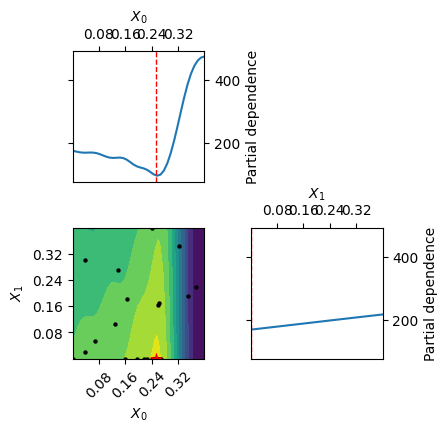

In [9]:
plot_objective(res)

## Test solution

<Axes: title={'center': 'action = [0.25432786975499144, 0.0], rew = -39.45858445006114'}, xlabel='t'>

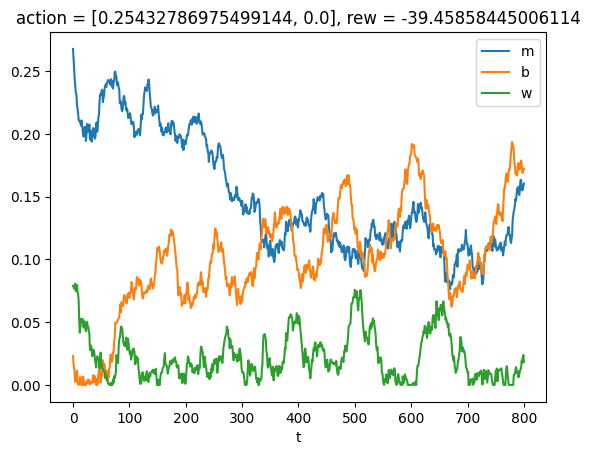

In [25]:
# CONFIG = {'sigma_M':0, 'sigma_B':0, 'sigma_W':0, }
CONFIG = {}
env = carib(config=CONFIG)

null_action = - np.ones(3, dtype=np.float32)
high_action = 0.5 * np.ones(3, dtype=np.float32)
all_wolves = np.float32([0.0, 0.5, 0.0])
all_moose = np.float32([0.5, 0.0, 0.0])
an_effort = np.float32([*res.x, 0.0])
# an_effort = np.float32([0.018989021076692904, 0.3169121824404405])

an_action = 2 * an_effort- 1

Ms, Bs, Ws, ts, rews = [], [], [], [], []
a_ms, a_bs = [], []

obs, _ = env.reset()
ep_rew=0
#
pop = env.population_units()
Ms.append(pop[0])
Bs.append(pop[1])
Ws.append(pop[2])
ts.append(0)
a_ms.append(env.parameters["a_M"])
a_bs.append(env.parameters["a_B"])
rews.append(ep_rew)
#
for t in range(env.Tmax):
    ts.append(t+1)
    obs, rew, term, trunc, info = env.step(an_action)
    pop = env.population_units()
    Ms.append(pop[0])
    Bs.append(pop[1])
    Ws.append(pop[2])
    a_ms.append(env.parameters["a_M"])
    a_bs.append(env.parameters["a_B"])
    ep_rew += rew
    rews.append(ep_rew)
    if term or trunc:
        break
    

ep = pd.DataFrame({
    't': ts,
    'm': Ms,
    'b': Bs,
    'w': Ws,
    'rew': rews,
    'a_M': a_ms,
    'a_B': a_bs,
})

ep.plot(x='t', y=['m', 'b', 'w'], title=f'action = {res.x}, rew = {ep_rew}')

## RL solution

In [4]:
from stable_baselines3 import PPO
from sb3_contrib import TQC

ppoAgent = PPO.load('../saved_agents/PPO-CaribouScipy', device='cpu')
tqcAgent = TQC.load('../saved_agents/TQC-CaribouScipy', device='cpu')

<Axes: title={'center': '-39.25649191800393'}, xlabel='t'>

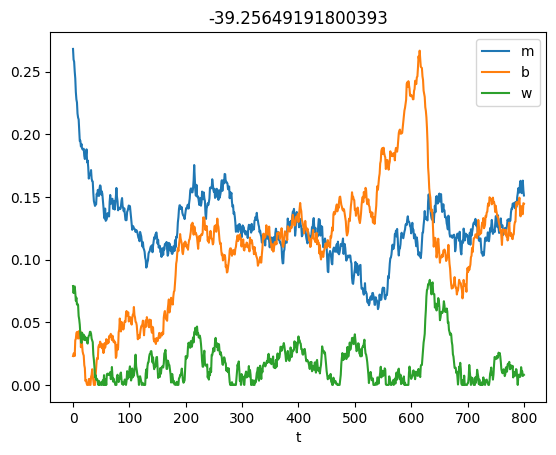

In [86]:
# CONFIG = {'sigma_M':0, 'sigma_B':0, 'sigma_W':0, }
CONFIG = {}
env = carib(config=CONFIG)

Ms, Bs, Ws, ts, rews = [], [], [], [], []
a_ms, a_bs = [], []
mculls, wculls, rests = [], [], []

obs, _ = env.reset()
ep_rew=0
#
pop = env.population_units()
Ms.append(pop[0])
Bs.append(pop[1])
Ws.append(pop[2])
ts.append(0)
a_ms.append(env.parameters["a_M"])
a_bs.append(env.parameters["a_B"])
rews.append(ep_rew)
mculls.append(0)
wculls.append(0)
rests.append(0)
#
for t in range(env.Tmax):
    action, info = ppoAgent.predict(obs)
    ts.append(t+1)
    obs, rew, term, trunc, info = env.step(action)
    pop = env.population_units()
    Ms.append(pop[0])
    Bs.append(pop[1])
    Ws.append(pop[2])
    a_ms.append(env.parameters["a_M"])
    a_bs.append(env.parameters["a_B"])
    mculls.append((action[0] + 1)/2)
    wculls.append((action[1] + 1)/2)
    rests.append((action[2] + 1)/2)
    ep_rew += rew
    rews.append(ep_rew)
    if term or trunc:
        break
    

ep = pd.DataFrame({
    't': ts,
    'm': Ms,
    'b': Bs,
    'w': Ws,
    'rew': rews,
    'a_M': a_ms,
    'a_B': a_bs,
    'mcull': mculls,
    'wcull': wculls,
    'restoration': rests,
})

ep.plot(x='t', y=['m', 'b', 'w'], title=f'{ep_rew}')

In [93]:
window = 10
ep['wcull_moving_av'] = ep['wcull'].rolling(window=window).mean()
ep['mcull_moving_av'] = ep['mcull'].rolling(window=window).mean()
ep['rest_moving_av'] = ep['restoration'].rolling(window=window).mean()

<Axes: title={'center': '-39.25649191800393'}, xlabel='t'>

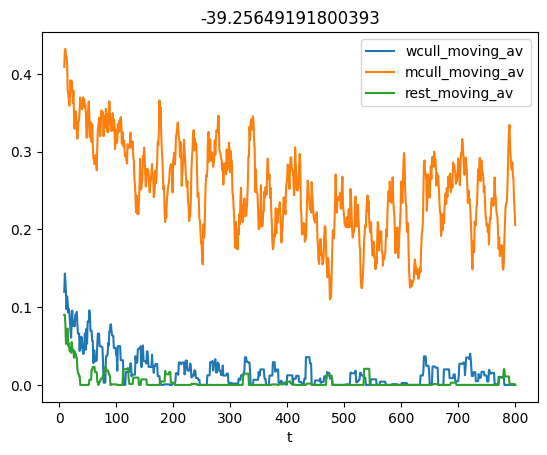

In [94]:
ep.plot(
    x='t', 
    y=['wcull_moving_av', 'mcull_moving_av', 'rest_moving_av'], 
    title=f'{ep_rew}',
)

<Axes: title={'center': '-21.292994096528044'}, xlabel='t'>

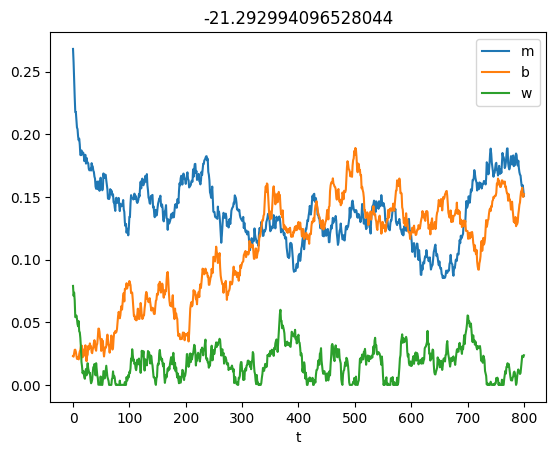

In [12]:
# CONFIG = {'sigma_M':0, 'sigma_B':0, 'sigma_W':0, }
CONFIG = {}
env = carib(config=CONFIG)

Ms, Bs, Ws, ts, rews = [], [], [], [], []
a_ms, a_bs = [], []
mculls, wculls, rests = [], [], []

obs, _ = env.reset()
ep_rew=0
#
pop = env.population_units()
Ms.append(pop[0])
Bs.append(pop[1])
Ws.append(pop[2])
ts.append(0)
a_ms.append(env.parameters["a_M"])
a_bs.append(env.parameters["a_B"])
rews.append(ep_rew)
mculls.append(0)
wculls.append(0)
rests.append(0)
#
for t in range(env.Tmax):
    action, info = ppoAgent.predict(obs)
    ts.append(t+1)
    obs, rew, term, trunc, info = env.step(action)
    pop = env.population_units()
    Ms.append(pop[0])
    Bs.append(pop[1])
    Ws.append(pop[2])
    a_ms.append(env.parameters["a_M"])
    a_bs.append(env.parameters["a_B"])
    mculls.append((action[0] + 1)/2)
    wculls.append((action[1] + 1)/2)
    rests.append((action[2] + 1)/2)
    ep_rew += rew
    rews.append(ep_rew)
    if term or trunc:
        break
    

ep = pd.DataFrame({
    't': ts,
    'm': Ms,
    'b': Bs,
    'w': Ws,
    'rew': rews,
    'a_M': a_ms,
    'a_B': a_bs,
    'mcull': mculls,
    'wcull': wculls,
    'restoration': rests,
})

ep.plot(x='t', y=['m', 'b', 'w'], title=f'{ep_rew}')

<Axes: title={'center': '-21.292994096528044'}, xlabel='t'>

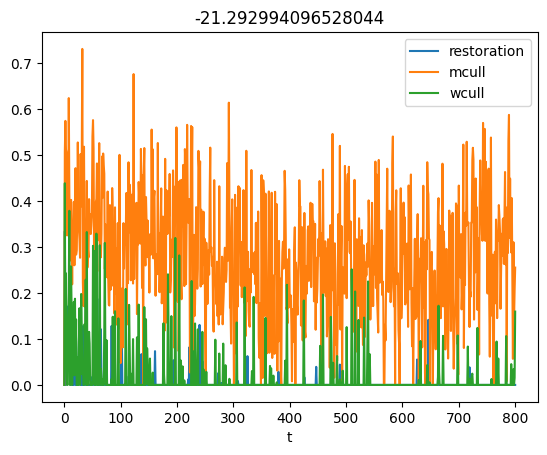

In [13]:
ep.plot(x='t', y=['restoration', 'mcull', 'wcull'], title=f'{ep_rew}')

<Axes: title={'center': '-791.6995541050107'}, xlabel='t'>

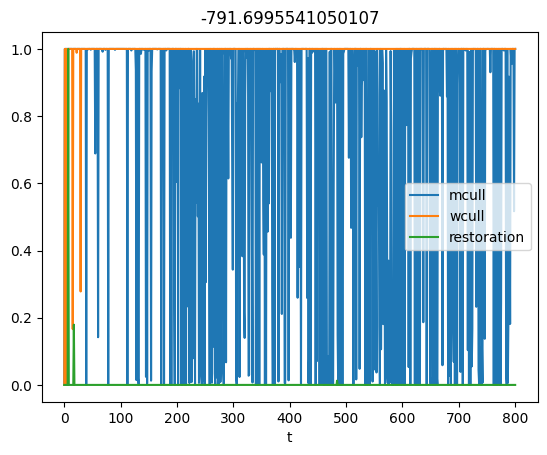

In [44]:
ep.plot(x='t', y=['mcull', 'wcull', 'restoration'], title=f'{ep_rew}')

## Reward distributions

In [7]:
caAgentRews = gather_stats(
    # manager = constAction(res.x), 
    manager = constAction(np.array([0.25, 0.0, 0.0])),
    env=carib(), 
    N=300, 
    return_ep_rewards=True,
)
ppoAgentRews = gather_stats(
    manager = ppoAgent, 
    env=carib(), 
    N=300, 
    return_ep_rewards=True,
)

2024-06-21 15:28:27,545	INFO worker.py:1770 -- Started a local Ray instance.
2024-06-21 15:28:34,376	INFO worker.py:1770 -- Started a local Ray instance.


In [8]:
tqcAgentRews = gather_stats(
    manager = tqcAgent, 
    env=carib(), 
    N=300, 
    return_ep_rewards=True,
)

2024-06-21 15:29:47,193	INFO worker.py:1770 -- Started a local Ray instance.


In [9]:
ca_df = pd.DataFrame({
    'rew': caAgentRews,
    'strat': 'const_action',
})
ppo_df = pd.DataFrame({
    'rew': ppoAgentRews,
    'strat': 'ppo',
})
tqc_df = pd.DataFrame({
    'rew': tqcAgentRews,
    'strat': 'tqc',
})
rews_df = pd.concat([ca_df, ppo_df])
print(
    f"ppo: {np.mean(ppo_df.rew): .2f}, "
    f"tqc: {np.mean(tqc_df.rew): .2f}, "
    f"c. act.: {np.mean(ca_df.rew): .2f}"
)

ppo: -35.99, tqc: -769.26, c. act.: -71.54


In [10]:
from plotnine import ggtitle

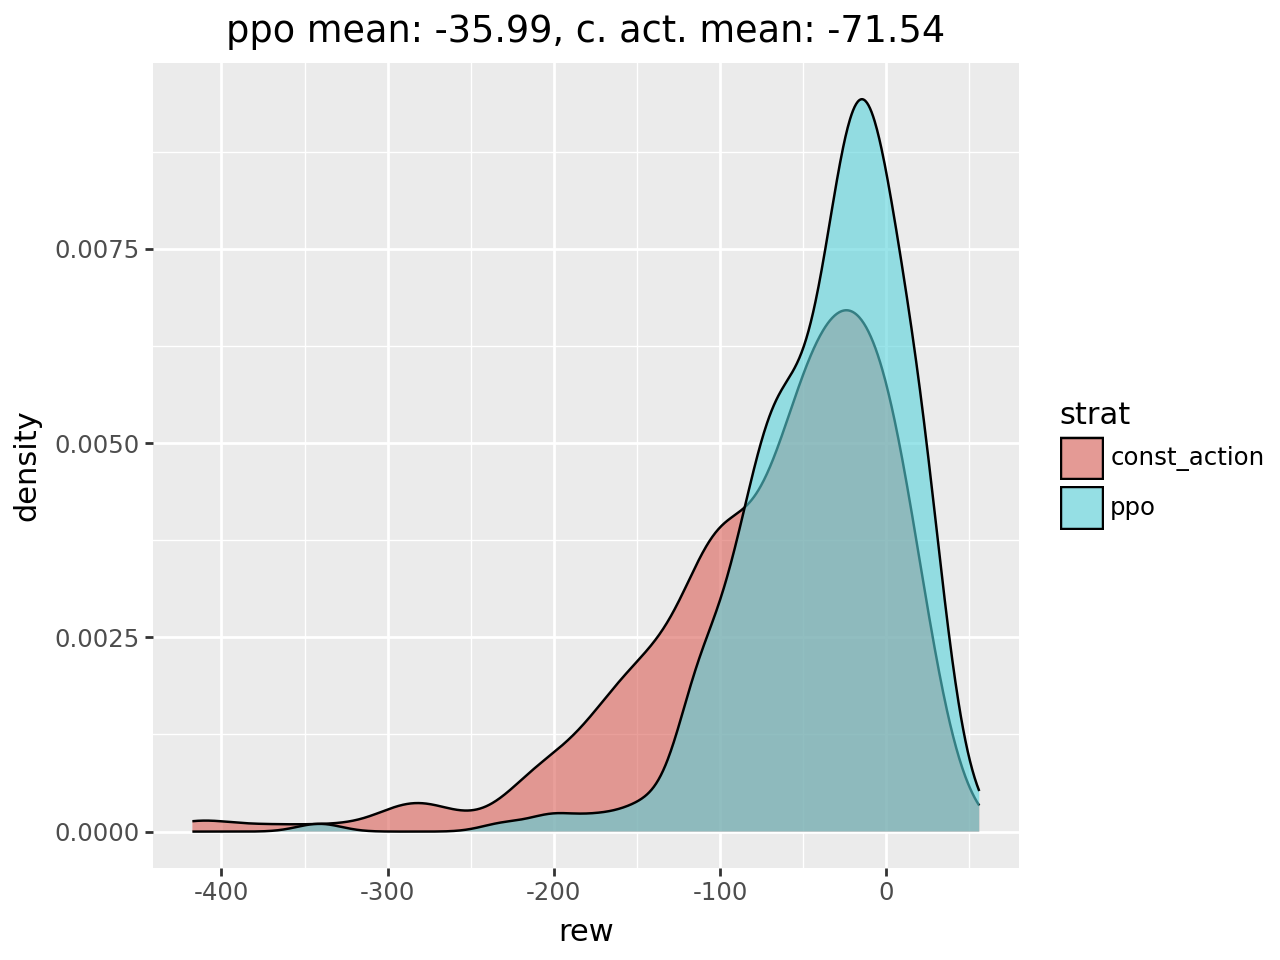

In [11]:
(
    ggplot(rews_df, aes(x='rew', fill='strat')) 
    + geom_density(alpha=0.6) 
    + ggtitle(f"ppo mean: {np.mean(ppo_df.rew): .2f}, c. act. mean: {np.mean(ca_df.rew): .2f}")
)